# Module 1 Project - Non-Technical Audience
## Ben Geissel & Andrew Cole

   We set out to explore a variety of databases related to movie production outcomes, with the goal of providing Microsoft with actionable recommendations for their venture into the movie production business.

   We looked at the Box Office Mojo (BOM) database of 3,387 films and The Movie Database (TMDB) of 5,782 films to investigate various financial insights. Additionally, we looked at several IMDB databases with just over 1,000,000 film entries in order to investigate the highest rated personnel for the movie production.
   
   These financial and personnel insights were used to provide Microsoft with course of action recommendations for their upcoming investments in movie production.

We used the following python code to organize our data and generate visualizations and helpful data tables, which assisted in our exploration of various actionable outcomes for Microsoft.

In [1]:
# Here we import libraries with proper aliases in order to run visualizations below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import tmdb_clean
import bom_clean
import imdb_clean

### First, we will look at the financial data and outcomes
The TMDB analysis below only looks at movies that played in theaters, excluding movies that went straight to DVD or streaming services.

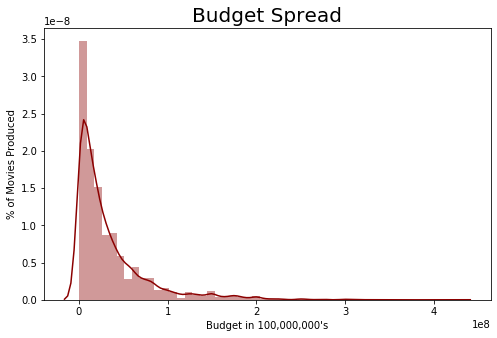

In [2]:
# Bring in TMDB data for checking the spread of budget sizes
tmdb_budgets_df = tmdb_clean.clean('tn.movie_budgets.csv')
tmdb_clean.plot_budget_sizes(tmdb_budgets_df)

The above graph shows us that most movie budgets are fairly small, therefore we need to split the films into budget size categories with more splits in the smaller range.

-----

With our new budget size categories, we can investigate how budget size affects the Return on Investment (ROI) of a film. The following chart shows our findings for domestic and worldwide ROI's. You will see that smaller budget films have a higher ROI on average. Domestic ROI patterns follow worldwide ROI patterns as well.

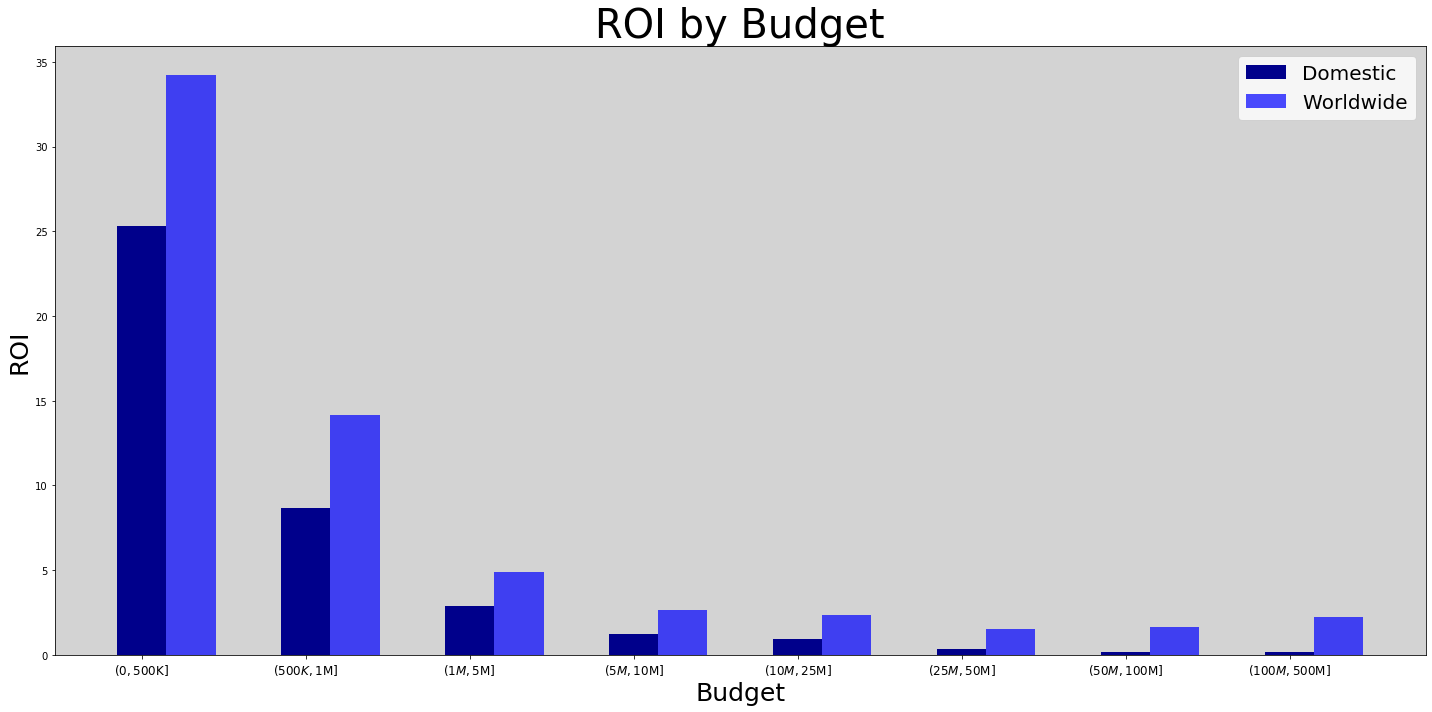

In [3]:
# Calculate ROI and plot results by budget category
domestic_roi_dict = tmdb_clean.domestic_ROI(tmdb_budgets_df)
worldwide_roi_dict = tmdb_clean.worldwide_ROI(tmdb_budgets_df)
tmdb_clean.plot_ROI(domestic_roi_dict, worldwide_roi_dict)

The next decision to be made will be which movie studio Microsoft should choose for production. We used the Box Office Mojo database to determine the top 10 studios which generated the highest average domestic gross revenue for their films. You will see in the following chart that two studios, BV (Disney) and P/DW (Paramount), significantly outperform the others on average.

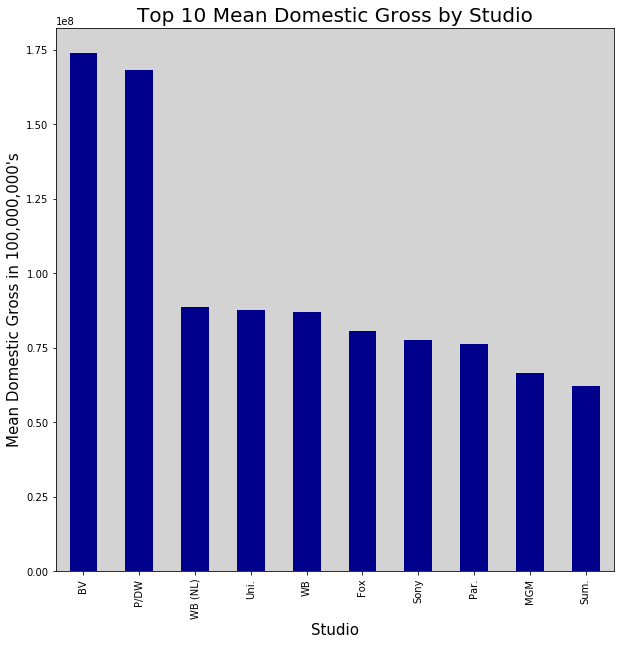

In [4]:
# Bring in BOM database; group and sort data; plot top 10 studios by average domestic gross revenue
bom_df = bom_clean.clean('bom.movie_gross.csv')
bom_studio_grouped_topten_df = bom_clean.bom_group_and_sort(bom_df)
bom_clean.plot_studios(bom_studio_grouped_topten_df)

-----

### Now that we have our financial insights, we will look at several IMDB databases to determine who the best personnel are to have in a movie production.
A person's value to the production is determined by the average rating of the movies they are credited on in the IMDB database.

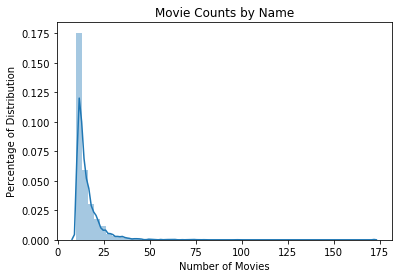

In [5]:
# Plot movie appearance count distribution for movie personnel
imdb_clean_new = imdb_clean.merge_clean_imdb_files()
imdb_clean.movie_count_dist(imdb_clean_new)

The above chart shows us that a very large percentage of movie personnel were credited on less than 10 movies. We want to exclude these people because ratings may be less reliable due to a small number of ratings. We only want to consider those personnel who are established in the movie industry.

(Movies that did not receive an average rating were excluded from the analysis.)

In [6]:
# Display data table of top 10 rated movie personnel regardless of job category
top_name_ratings = imdb_clean.highest_rated_personnel(imdb_clean_new)
top_name_ratings

,Average Rating,Category,Primary Name
49669,10.0,composer,Grégoire Hetzel
35361,10.0,editor,Nadia Ben Rachid
149867,9.9,self,Sergey A.
131236,9.8,self,Maria Olsen
46613,9.7,actor,Eric Roberts
9002,9.7,actor,Leonardo DiCaprio
161585,9.7,actor,Kevin Sizemore
74091,9.7,actress,Margot Robbie
33044,9.7,producer,David Heyman
687,9.7,actor,Brad Pitt


The above chart displays the overall top 10 highest rated personnel regardless of job category based on the movies they have been credited on. 

----

The below chart displays the top rated personnel by job category.

('Self' denotes the person was credited as appearing as themselves, typically in a documentary.)

In [7]:
# Display the top personnel by job category
imdb_clean.top_ratings_by_category(top_name_ratings)

,Average Rating,Primary Name
Category,,
actor,9.7,Leonardo DiCaprio
actress,9.7,Margot Robbie
composer,10,Grégoire Hetzel
editor,10,Nadia Ben Rachid
producer,9.7,David Heyman
self,9.9,Sergey A.


### Actionable Insights for Microsoft

- Microsoft should first consider which studios they would like to produce their films.
    - On average, Disney and Paramount generate the highest average gross revenue.
- Next, Microsoft should determine their budget size for an individual movie.
    - On average, lower budget movies (under \$1M budget size) generate the highest return on investment both domestically and worldwide.
    - We recommend making many small budget movies to optimize ROI.
    - However, if Microsoft would prefer a more passive investment strategy, it is still profitable on average to create large budget movies \(\$1M to \$500M\)
    - ROI Pattern: Average ROI decreases as budget size increases
- For personnel hiring decisions, Microsoft should look to onboard those displayed in the data tables above.
    - For small budget films, aim to sign one highly rated personnel to lead cast or crew.
    - If Microsoft takes a passive approach and makes a large budget film, aim to bring on multiple highly rated personnel.